In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.metrics import accuracy_score as sk_accuracy_score

from dklearn.linear_model import LogisticRegression as dk_LogisticRegression
from dklearn.metrics import accuracy_score as dk_accuracy_score

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)

In [3]:
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression from Scikit-Learn

In [6]:
sk_clf = sk_LogisticRegression(solver='lbfgs')
sk_clf.fit(X_train, y_train)

sk_y_pred = sk_clf.predict(X_test)

print("Accuracy:", sk_accuracy_score(y_test, sk_y_pred))

Accuracy: 1.0


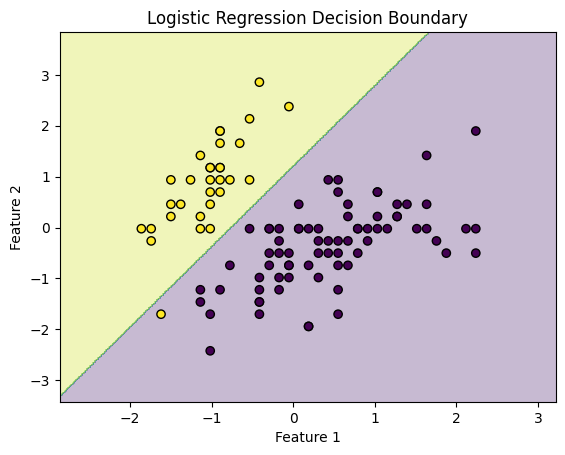

In [7]:
plot_decision_boundary(X_train, y_train, sk_clf)

# Logistic Regression from Scratch

In [8]:
dk_clf = dk_LogisticRegression()
dk_clf.fit(X_train, y_train)

dk_y_pred = dk_clf.predict(X_test)
print("Accuracy:", dk_accuracy_score(y_test, dk_y_pred))

Accuracy: 0.9555555555555556


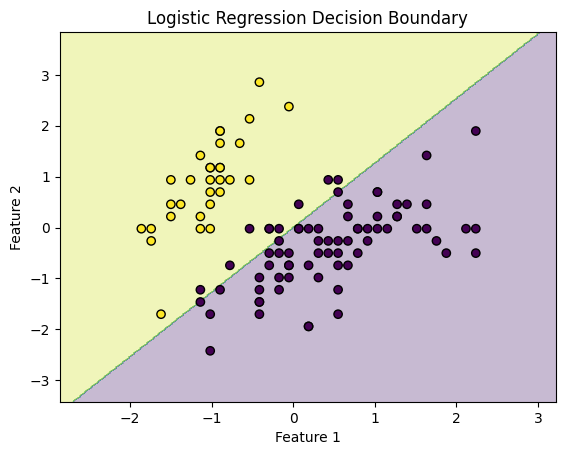

In [9]:
plot_decision_boundary(X_train, y_train, dk_clf)